In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
draft = pd.read_csv('draft2.csv')
draft.head()

,Rk,Player,Pos,Draft Position,Age,!Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,48,DeAndre' Bembry\bembrde01,SG,21,25,ATL,43,4,915,104,...,0.542,34,118,152,81,55,19,60,84,249
1,82,Charlie Brown\brownch02,SG,0,22,ATL,10,0,40,6,...,1.000,2,2,4,2,2,2,3,3,20
2,106,Vince Carter\cartevi01,SF,5,43,ATL,60,0,876,107,...,0.793,18,106,124,48,23,25,33,90,298
3,132,John Collins\collijo01,PF,19,22,ATL,41,41,1363,353,...,0.800,116,300,416,60,31,66,75,138,885
4,142,Allen Crabbe\crabbal01,SG,31,27,ATL,28,1,522,52,...,0.750,10,55,65,28,15,4,12,36,143


In [3]:
def undrafted(i):
    if i == 0:
        return 100
    return i

In [4]:
draft['Draft Position'] = draft['Draft Position'].apply(undrafted)
draft.head()

,Rk,Player,Pos,Draft Position,Age,!Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,48,DeAndre' Bembry\bembrde01,SG,21,25,ATL,43,4,915,104,...,0.542,34,118,152,81,55,19,60,84,249
1,82,Charlie Brown\brownch02,SG,100,22,ATL,10,0,40,6,...,1.000,2,2,4,2,2,2,3,3,20
2,106,Vince Carter\cartevi01,SF,5,43,ATL,60,0,876,107,...,0.793,18,106,124,48,23,25,33,90,298
3,132,John Collins\collijo01,PF,19,22,ATL,41,41,1363,353,...,0.800,116,300,416,60,31,66,75,138,885
4,142,Allen Crabbe\crabbal01,SG,31,27,ATL,28,1,522,52,...,0.750,10,55,65,28,15,4,12,36,143


In [5]:
backbone = draft.groupby('!Tm').mean()[['Draft Position', 'Age']]

In [6]:
summed_positions = draft.groupby('!Tm').sum()['Draft Position']

In [7]:
mean_positions = draft.groupby('!Tm').mean()['Draft Position']

In [8]:
backbone['summed'] = summed_positions

In [9]:
backbone

,Draft Position,Age,summed
!Tm,,,
ATL,35.523810,25.761905,746
BOS,42.176471,24.588235,717
BRK,43.200000,25.450000,864
CHI,44.705882,24.176471,760
CHO,30.500000,24.937500,488
CLE,48.333333,24.619048,1015
DAL,54.111111,26.888889,974
DEN,43.105263,25.157895,819
DET,44.045455,25.454545,969


In [10]:
wins = [20, 43, 30, 22, 23, 19, 40, 43, 20, 15, 40, 39, 44, 49, 32, 41, 53, 19, 28, 21, 40, 30, 39, 26, 39,
        28, 27, 46, 0, 41, 24]

In [11]:
backbone['w'] = wins

In [12]:
list(backbone.index).remove('TOT')

In [13]:
backbone = backbone[backbone['w'] > 0]

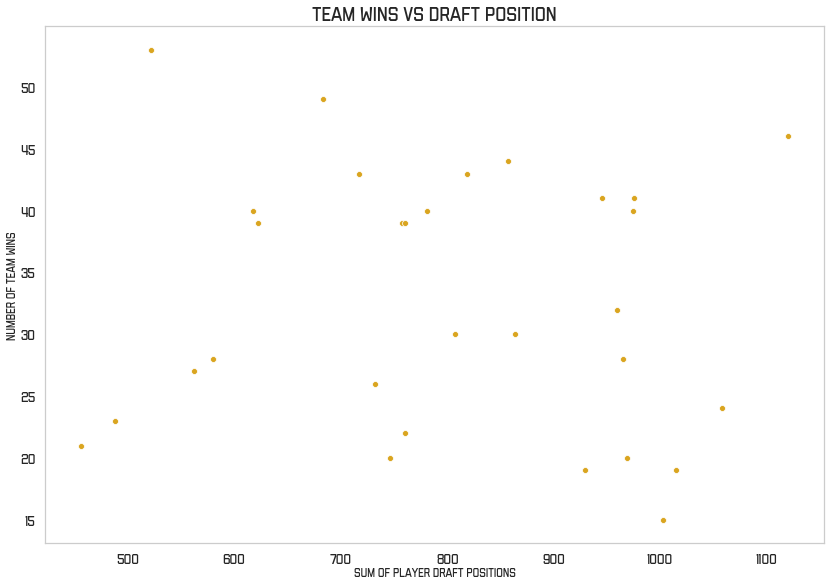

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(x='summed', y='w', data=backbone, color='goldenrod');
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Sum of player draft positions', fontproperties=prop, size=12);
plt.ylabel('Number of team wins', fontproperties=prop, size=12);
#plt.axhline(y=np.mean(data['Points']),linewidth=2, color='k');
ax.set_title('Team wins vs draft position', fontproperties=prop, size=20)
#plt.plot([50, 450], [0, 150], '--', linewidth=2)
plt.tight_layout()
plt.savefig("fg.png")

In [25]:
backbone.sort_values('Age')

,Draft Position,Age,summed,w
!Tm,,,,
PHO,40.666667,24.111111,732,26
CHI,44.705882,24.176471,760,22
OKC,36.352941,24.352941,618,40
MIN,38.708333,24.541667,929,19
BOS,42.176471,24.588235,717,43
GSW,45.545455,24.590909,1002,15
CLE,48.333333,24.619048,1015,19
NOP,36.250000,24.875000,580,28
IND,44.588235,24.882353,758,39


In [21]:
g = draft[['!Tm', 'Draft Position']]#.groupby('!Tm').count()

In [23]:
g.head()

,!Tm,Draft Position
0,ATL,21
1,ATL,100
2,ATL,5
3,ATL,19
4,ATL,31


In [24]:
for i in list(set(g['!Tm'].values)):
    print(i)
    print(len(g[(g['!Tm'] == i) & (g['Draft Position'] == 100)]))

LAL
4
POR
5
BRK
5
DET
6
MIL
1
LAC
5
DEN
3
MIN
5
OKC
2
ORL
6
HOU
5
CHI
6
SAS
2
TOT
11
WAS
6
NYK
1
DAL
8
ATL
5
CHO
2
PHO
5
PHI
1
MIA
7
CLE
8
SAC
6
NOP
4
UTA
5
BOS
5
IND
5
MEM
6
TOR
8
GSW
7
